# Problem Statement 1
The data (sample) were collected in São Paulo — Brazil, in a university, where there are some parties with groups of students from 18 to 28 years of age(average). The dataset used for this activity has 7 attributes, being a Target, with a period of one year. You have to predict the quantity of beer consumption basedon the features that contain climate conditions.

Dataset Description:

I.Data: date of the record

II.Temperatura Media (C): Average temperature of the day in celsius

III.Temperatura Minima (C): Minimum temperature of the day in celsius

IV.TemperaturaMaxima (C): Maximum temperature of the day in celsius

V.Precipitacao (mm): Percipitation in mm

VI.Final de Semana: If the day is the weekend or not

VII.Consumo de cerveja (litros): Beer consumption in liters


Write a Python code to perform the following tasks mentioned:

1.Load the dataset, check its shape

2.Rectify the data of the first four columns 

Hint:Check columns 'Temperatura Media (C)', 'Temperatura Minima (C)', 'TemperaturaMaxima (C)', and 'Precipitac’Fix the following errors present in these features

3.Create new features using the 'Data' feature and the make 'Data' column as index

Hint:Create a new feature 'Month' from the dates, consisting of the month of the year.Create a new feature 'Day' from the dates, consisting of the day of the week.Set values from the 'Data' column as indexes. Use code snippet:df1.set_index('Data',inplace=True)

4.Handle null and duplicate values 

5.Check the data typeof the features and convert them to the appropriate data type 

6.Analyze features with outlier values  

7.Plot and analyze the correlation 

8.Split the dataset for training and testing 

9.Train a linear regression model and print the intercept and coefficients 

10.Evaluate the model using the R2 score, mean absolute error, and root mean squared error 


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import datetime

1.Load the dataset, check its shape

In [2]:
df=pd.read_csv("C:\\Users\\King\\Desktop\\DSML Internship\\Assignments\\Assignment 4\\Assignment 4 Dataset\\Consumo_cerveja.csv",parse_dates=['Data'])
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [3]:
df.shape

(941, 7)

2.Rectify the data of the first four columns

Hint:Check columns 'Temperatura Media (C)', 'Temperatura Minima (C)', 'TemperaturaMaxima (C)', and 'Precipitac’Fix the following errors present in these features

In [4]:
df.rename(columns={
    'Temperatura Media (C)': 'Temp_Media_C',
    'Temperatura Minima (C)': 'Temp_Mini_C',
    'Temperatura Maxima (C)': 'Temp_Maxi_C',
    'Precipitacao (mm)': 'Precipitation_mm'
}, inplace=True)

df['Temp_Media_C']=df['Temp_Media_C'].str.replace(',','.')
df['Temp_Mini_C']=df['Temp_Mini_C'].str.replace(',','.')
df['Temp_Maxi_C']=df['Temp_Maxi_C'].str.replace(',','.')
df['Precipitation_mm']=df['Precipitation_mm'].str.replace(',','.')

df.head(5)

,Data,Temp_Media_C,Temp_Mini_C,Temp_Maxi_C,Precipitation_mm,Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


3.Create new features using the 'Data' feature and the make 'Data' column as index

Hint:Create a new feature 'Month' from the dates, consisting of the month of the year.Create a new feature 'Day' from the dates, consisting of the day of the week.Set values from the 'Data' column as indexes. Use code snippet:df1.set_index('Data',inplace=True)

In [5]:
df['Month']=df['Data'].dt.month
df['Day']=df['Data'].dt.day

In [6]:
df.set_index('Data',inplace=True)
df.head(5)

,Temp_Media_C,Temp_Mini_C,Temp_Maxi_C,Precipitation_mm,Final de Semana,Consumo de cerveja (litros),Month,Day
Data,,,,,,,,
2015-01-01,27.3,23.9,32.5,0,0.0,25.461,1.0,1.0
2015-01-02,27.02,24.5,33.5,0,0.0,28.972,1.0,2.0
2015-01-03,24.82,22.4,29.9,0,1.0,30.814,1.0,3.0
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1.0,4.0
2015-01-05,23.82,21,28.3,0,0.0,28.900,1.0,5.0


4.Handle null and duplicate values

In [7]:
null=df.isnull().sum()
print(null)

Temp_Media_C                   576
Temp_Mini_C                    576
Temp_Maxi_C                    576
Precipitation_mm               576
Final de Semana                576
Consumo de cerveja (litros)    576
Month                          576
Day                            576
dtype: int64


In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(365, 8)

In [10]:
null=df.isnull().sum()
print(null)

Temp_Media_C                   0
Temp_Mini_C                    0
Temp_Maxi_C                    0
Precipitation_mm               0
Final de Semana                0
Consumo de cerveja (litros)    0
Month                          0
Day                            0
dtype: int64


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
print(df.head())

           Temp_Media_C Temp_Mini_C Temp_Maxi_C Precipitation_mm  \
Data                                                               
2015-01-01         27.3        23.9        32.5                0   
2015-01-02        27.02        24.5        33.5                0   
2015-01-03        24.82        22.4        29.9                0   
2015-01-04        23.98        21.5        28.6              1.2   
2015-01-05        23.82          21        28.3                0   

            Final de Semana  Consumo de cerveja (litros)  Month  Day  
Data                                                                  
2015-01-01              0.0                       25.461    1.0  1.0  
2015-01-02              0.0                       28.972    1.0  2.0  
2015-01-03              1.0                       30.814    1.0  3.0  
2015-01-04              1.0                       29.799    1.0  4.0  
2015-01-05              0.0                       28.900    1.0  5.0  


5.Check the data typeof the features and convert them to the appropriate data type

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temp_Media_C                 365 non-null    object 
 1   Temp_Mini_C                  365 non-null    object 
 2   Temp_Maxi_C                  365 non-null    object 
 3   Precipitation_mm             365 non-null    object 
 4   Final de Semana              365 non-null    float64
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Month                        365 non-null    float64
 7   Day                          365 non-null    float64
dtypes: float64(4), object(4)
memory usage: 25.7+ KB


In [14]:
df['Temp_Media_C']=df[['Temp_Media_C']].astype(float)
df['Temp_Mini_C']=df['Temp_Mini_C'].astype(float)
df['Temp_Maxi_C']=df['Temp_Maxi_C'].astype(float)
df['Precipitation_mm']=df['Precipitation_mm'].astype(float)
df['Final de Semana']=df['Final de Semana'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temp_Media_C                 365 non-null    float64
 1   Temp_Mini_C                  365 non-null    float64
 2   Temp_Maxi_C                  365 non-null    float64
 3   Precipitation_mm             365 non-null    float64
 4   Final de Semana              365 non-null    int32  
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Month                        365 non-null    float64
 7   Day                          365 non-null    float64
dtypes: float64(7), int32(1)
memory usage: 24.2 KB


In [16]:
df.describe()

,Temp_Media_C,Temp_Mini_C,Temp_Maxi_C,Precipitation_mm,Final de Semana,Consumo de cerveja (litros),Month,Day
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367,6.526027,15.720548
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143,3.452584,8.808321
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000,1.000000,1.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000,4.000000,8.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000,7.000000,16.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000,10.000000,23.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000,12.000000,31.000000


6.Analyze features with outlier values

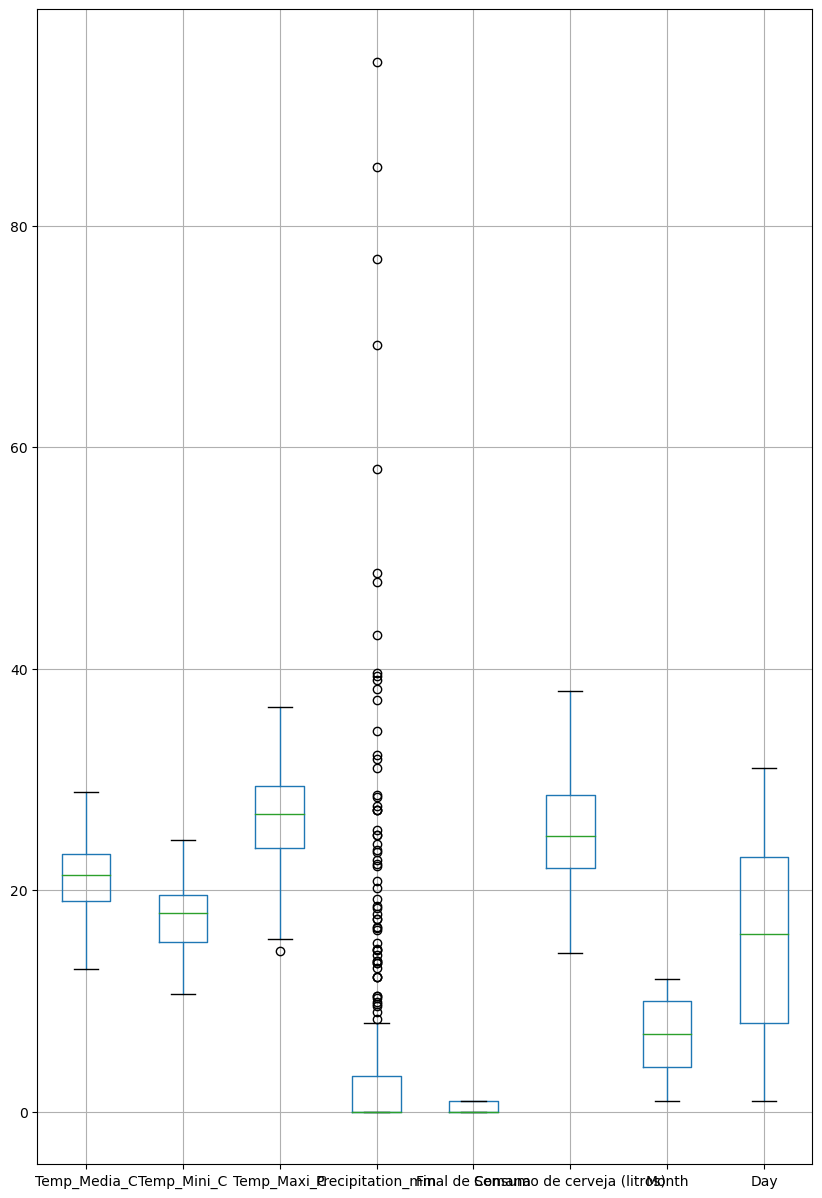

In [17]:
df.boxplot(figsize=(10,15))
plt.show()

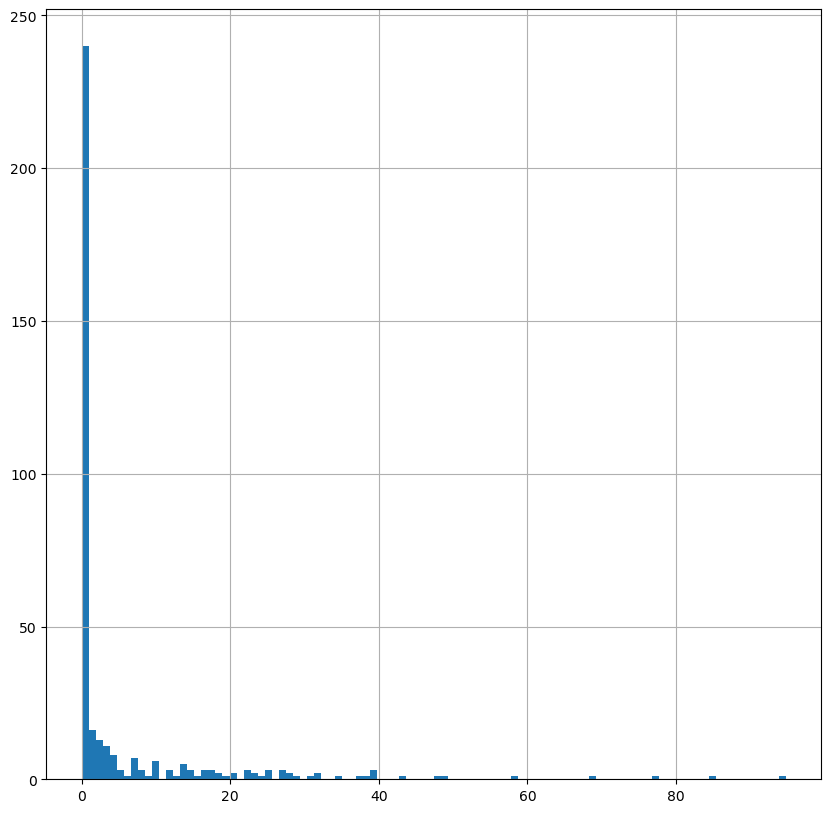

In [18]:
df['Precipitation_mm'].hist(bins=100,figsize=(10,10))
plt.show()

7.Plot and analyze the correlation

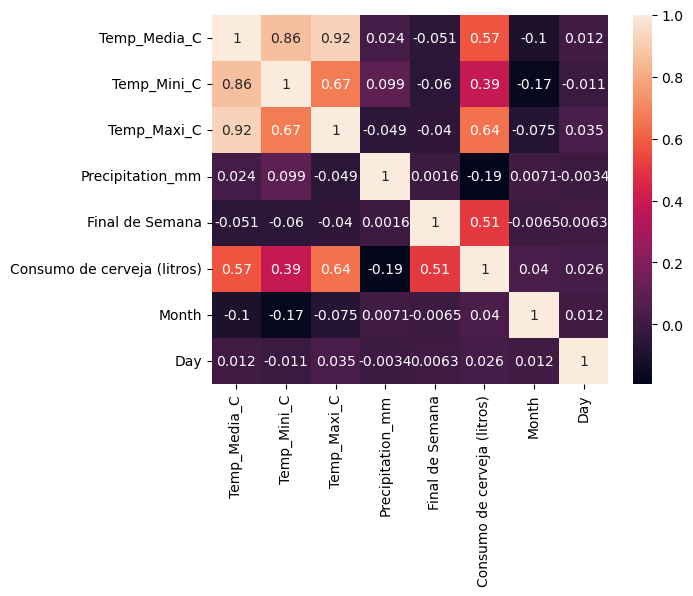

<Figure size 1000x600 with 0 Axes>

In [19]:
import seaborn as sns
correlation=df.corr()
sns.heatmap(correlation,annot = True)
plt.figure(figsize=(10, 6))
plt.show()

8.Split the dataset for training and testing

In [20]:
X=df[['Temp_Media_C', 'Temp_Mini_C', 'Temp_Maxi_C', 'Precipitation_mm', 'Final de Semana', 'Month', 'Day']]
y=df['Consumo de cerveja (litros)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(292, 7)
(73, 7)
(292,)
(73,)


9.Train a linear regression model and print the intercept and coefficients

In [21]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print("final coefficent: ",lr.coef_)
print("final intercet: ",lr.intercept_)

final coefficent:  [ 3.94976481e-02 -1.91877945e-04  6.50263753e-01 -4.38101565e-02
  5.23262603e+00  1.41392806e-01  4.16493780e-03]
final intercet:  5.003989009263812


C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is

10.Evaluate the model using the R2 score, mean absolute error, and root mean squared error

In [22]:
y_pred=lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R-squared (R2) Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R-squared (R2) Score: 0.7406
Mean Absolute Error (MAE): 1.9870
Root Mean Squared Error (RMSE): 2.3975


C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is

# Problem Statement 2
You are provided with the California housing dataset. Based on the given parameters of a house, predict its price.

Dataset Description:

The dataset contains nine features:

I.longitude: A measure of how far west a house is; a higher value is farther west

II.latitude: A measure of how far north a house is; a higher value is farther north

III.housingMedianAge: Median age of a house within a block; a lower number is a newer building

IV.total rooms: Total number of rooms within a block

V.total bedrooms: Total number of bedrooms within a block

VI.population: Total number of people residing within a block

VII.households: Total number of households, a group of people residing within a home unit, for a block

VIII.median income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

IX.median house value:Median house value for households within a block (measured in US Dollars)

Write a Python code to perform the following tasks mentioned:

1.Load the data, check its shape and check for null values 

2.Split the dataset for training and testing -1000 instances for testing

3.Train the model using sklearn (Apply linear regression to train a model for prediction)

4.Predict the prices on test data and evaluate the modelby r2 score and mean absolute error

5.Find coefficient and intercept using the trained model

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

1.Load the data, check its shape and check for null values

In [24]:
df=pd.read_csv("C:\\Users\\King\\Desktop\\DSML Internship\\Assignments\\Assignment 4\\Assignment 4 Dataset\\california_housing_train.csv")
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [25]:
df.shape

(17000, 9)

In [26]:
null=df.isnull().sum()
print(null)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


2.Split the dataset for training and testing -1000 instances for testing

In [27]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=42)

3.Train the model using sklearn (Apply linear regression to train a model for prediction)

In [28]:
lr=LinearRegression()
lr.fit(X_train,y_train)

C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is

LinearRegression()

4.Predict the prices on test data and evaluate the modelby r2 score and mean absolute error

In [29]:
y_pred=lr.predict(X_test)
r2=r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
print("R-squared Score:", r2)
print("Mean Absolute Error:",mae)

R-squared Score: 0.6427633944326567
Mean Absolute Error: 52486.71121771133


C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is

5.Find coefficient and intercept using the trained model

In [30]:
coeffi=lr.coef_
inter=lr.intercept_
print("Coefficient of trained model: ",coeffi)
print("Intercept of trained model: ",inter)

Coefficient of trained model:  [-4.32650586e+04 -4.29877050e+04  1.13224456e+03 -8.24971921e+00
  1.15173391e+02 -3.72835206e+01  4.39458716e+01  4.04437504e+04]
Intercept of trained model:  -3632877.842511664


# Problem Statement 3

You are provided with the medical cost dataset. You need to predict individual medical costs billed by health insurance.Dataset Description:

I.age: age of the primary beneficiary

II.sex: gender of primary beneficiary female, male

III.bmi: Body mass index, providing an understanding of the body, weights that are relatively high or low relative to height, an objective index of body

IV.weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

V.children: Number of children covered by health insurance / Number of dependents

VI.smoker: Smokes or notVII.region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

VIII.charges: Individual medical costs billed by health insurance

Write a Python code to perform the following tasks mentioned:

1.Load the data, check its shape and check for null values 

2.Convert categorical features to numerical values (Use One-Hot Encoding)

3.Split the dataset for training and testing  

4.Train the model using sklearn –Linear Regression

5.Find the intercept and coefficient from the trained model 

6.Predict the prices of test data and evaluate the model using calculatedr2 score and root mean squared error

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

1.Load the data, check its shape and check for null values

In [32]:
df=pd.read_csv("C:\\Users\\King\\Desktop\\DSML Internship\\Assignments\\Assignment 4\\Assignment 4 Dataset\\insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
df.shape

(1338, 7)

In [34]:
null=df.isnull().sum()
print(null)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


2.Convert categorical features to numerical values (Use One-Hot Encoding)

In [35]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

3.Split the dataset for training and testing

In [36]:
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4.Train the model using sklearn –Linear Regression

In [37]:
lr=LinearRegression()
lr.fit(X_train,y_train)

C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is

LinearRegression()

5.Find the intercept and coefficient from the trained model

In [38]:
coeffi=lr.coef_
inter=lr.intercept_
print("Coefficient of trained model: ",coeffi)
print("Intercept of trained model: ",inter)

Coefficient of trained model:  [ 2.56975706e+02  3.37092552e+02  4.25278784e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]
Intercept of trained model:  -11931.219050326674


6.Predict the prices of test data and evaluate the model using calculatedr2 score and root mean squared error

In [39]:
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R2) Score: 0.7835929767120724
Root Mean Squared Error (RMSE): 5796.284659276272


C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is

Problem Statement 4: 

You are provided with the '50_Startups' data. Using the given features, you must predict the profit of these startups.Dataset Description:

I.R&D Spend: Expenditures in Research and Development

II.Administration: Expenditures in Administration

III.Marketing Spend: Expenditures in Marketing

IV.State: In which state the company belongs to

V.Profit: The profit made by the company

Write a Python code to perform the following tasks mentioned:

1.Load the data, check its shape and check for null values

2.Convert categorical features to numerical values using Label Encoder

3.Split the dataset for training and testing 

4.Train the model using sklearn(linear regression), also find the intercept and coefficient from the trained model 

5.Predict the profits of test data and evaluate the model using r2 score and mean squared error

6.Regularize the model using Ridge Regression and find the Score 

7.Regularize the model using LassoRegression and find the Score

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

1.Load the data, check its shape and check for null values

In [41]:
df=pd.read_csv("C:\\Users\\King\\Desktop\\DSML Internship\\Assignments\\Assignment 4\\Assignment 4 Dataset\\50_Startups.csv")
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [42]:
df.shape

(50, 5)

In [43]:
null=df.isnull().sum()
print(null)

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


2.Convert categorical features to numerical values using Label Encoder

In [44]:
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


3.Split the dataset for training and testing

In [45]:
X = df.drop('Profit', axis=1)
y = df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4.Train the model using sklearn(linear regression), also find the intercept and coefficient from the trained model

In [46]:
lr=LinearRegression()
lr.fit(X_train,y_train)

coeffi=lr.coef_
inter=lr.intercept_
print("Coefficient of trained model: ",coeffi)
print("Intercept of trained model: ",inter)

Coefficient of trained model:  [  0.80379465  -0.06791023   0.03126059 -16.82030683]
Intercept of trained model:  54080.716846113755


C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is

5.Predict the profits of test data and evaluate the model using r2 score and mean squared error

In [47]:
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared (R2) Score:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R2) Score: 0.9000614254946402
Mean Squared Error (MSE): 80929465.49097784


C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is

6.Regularize the model using Ridge Regression and find the Score

In [48]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_score = ridge.score(X_test, y_test)
print("Ridge Regression Score:", ridge_score)

Ridge Regression Score: 0.9000615874908106


C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is

7.Regularize the model using Lasso Regression and find the Score

In [49]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_score = lasso.score(X_test, y_test)
print("Lasso Regression Score:", lasso_score)

Lasso Regression Score: 0.9000618249851653


C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\King\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is